Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

In [361]:
import pandas as pd

In [362]:
#Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Рассчитайте основные статистики для переменных
### (среднее,медиана,мода,мин/макс,сред.отклонение)


Все основные статистики для переменных есть в таблице ниже.

Применяются к количественных переменным (первые пять столбцов): 

среднее - 50%

медианa -mean

минимальное значение -min

макcимальное значение - max

среднеквадратичное отклонение - std



In [363]:
df.iloc[:,:5].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


**Значение моды для  кaтегориальных переменных (последние пять столбцов в таблице):**


In [364]:
df.iloc[:,5:10].mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


## Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
### Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [365]:
#расчитаем коэффициенты корреляции для количественных переменных (первые пять столбцов)
df.iloc[:,:5].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:title={'center':'Тепловая карта корреляционной матрицы'}>

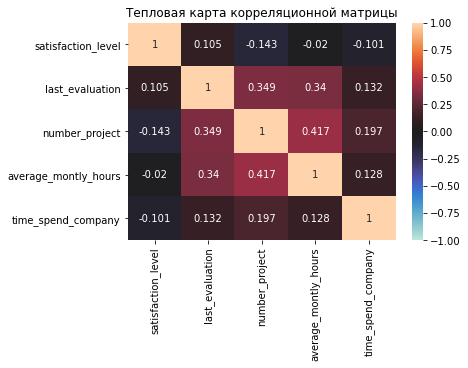

In [366]:
#выведем визуализацию heatmap корреляционной матрицы
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Тепловая карта корреляционной матрицы')
sns.heatmap(df.iloc[:,:5].corr(),annot = True, fmt ='.3g',vmin=-1, vmax=1, center = 0)

**Две самые скореллированные переменные**: average_montly_hours и number_project (коэф.корреляции 0.417)

**Две наименее скоррелированные переменные** average_montly_hours и satisfaction_level (коэф.корреляции -0.02)


## Рассчитайте сколько сотрудников работает в каждом департаменте.

In [367]:
df.loc[df['left'] == 0].groupby(by=['department']).count().iloc[:,:1].rename(columns={'satisfaction_level':'Кол-во сотрудников'})

,Кол-во сотрудников
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


## Показать распределение сотрудников по зарплатам.

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Кол-во сотрудников'>

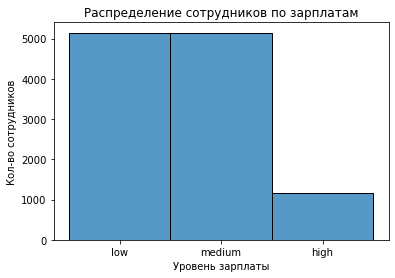

In [368]:
plt.title('Распределение сотрудников по зарплатам')
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Уровень зарплаты')
#оставим только сотрудников, которые в настоящее время работают в компании
sns.histplot(data=df.loc[df['left'] == 0], x='salary')

## Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

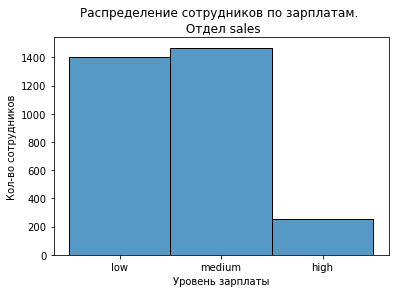

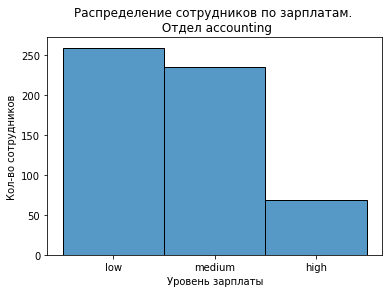

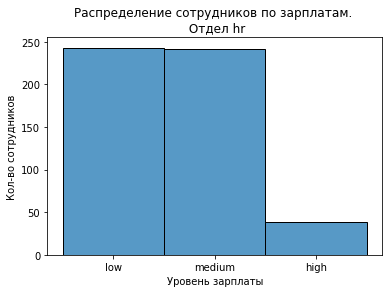

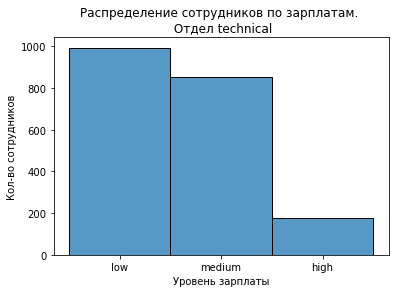

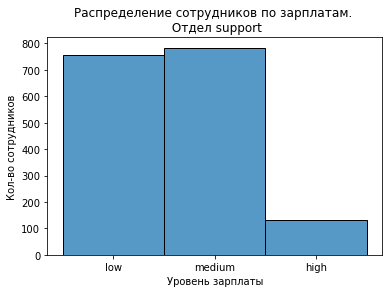

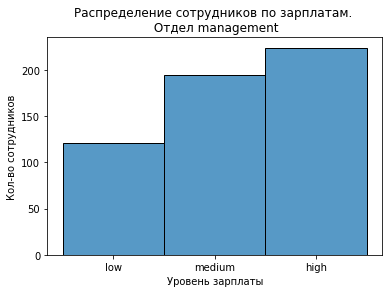

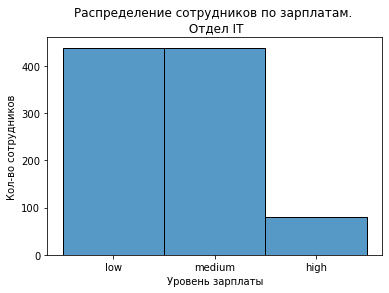

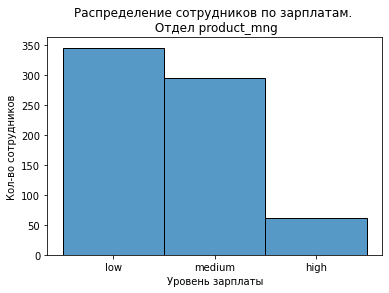

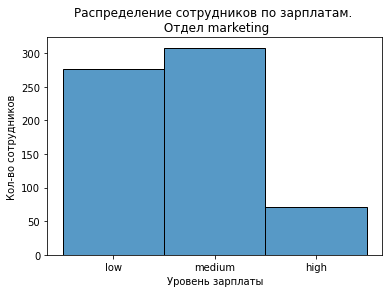

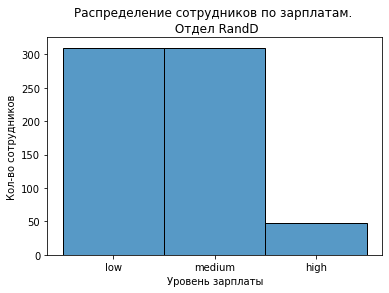

In [369]:
for i in df['department'].unique():
    #зададим одинаковый порядок вывода уровня зарплат в графиках
    df['salary'] = pd.Categorical(df['salary'], ['low','medium','high'])
    #оставим только сотрудников, которые в настоящее время работают в компании
    sns.histplot(data=df.loc[(df['left'] == 0) & (df['department']==i)], 
                 x='salary')
    text_title = 'Распределение сотрудников по зарплатам. \n Отдел '+i
    plt.title(text_title)
    plt.ylabel('Кол-во сотрудников')
    plt.xlabel('Уровень зарплаты')
    plt.show()

## Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Выдвинем нулевую гипотезу H0, что выборки статистически не различаются.
Целевая гипотеза - Н1, что выборки статистически различаются.
Применим т-тест Стьюдента

In [370]:
from scipy import stats as st
#альфу примем как 5%
alpha = 0.05
A1 = df[df['salary']== 'high']['average_montly_hours']
A2 = df[df['salary']== 'medium']['average_montly_hours']

# выдвинем гипотезу
H0 = ' Выборки статистически не различаются.'
H1 =  'Выборки статистически различаются.'
A1_version = 'Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом'
A2_version = 'Сотрудники с низким окладом проводят на работе больше времени, чем сотрудники с высоким окладом'
result = st.ttest_ind(A1,A2, equal_var=False)
print(A1.mean())
print(A2.mean())

print(result)

if (result.pvalue < alpha):
    print(H1)
    if result.statistic > 0:
        print(A1_version)
    else:
        print(A2_version)
else:
    print(H0)


199.86742118027485
201.33834936394663
Ttest_indResult(statistic=-0.9876902345946122, pvalue=0.3234385310547564)
 Выборки статистически не различаются.


p.value (0.323) > alfa (0.05)
Оснований отвергнуть нулевую гипотезу нет.

**Проверим наши выводы: построим boxplot**

Text(0.5, 0, 'Уровень зарплаты')

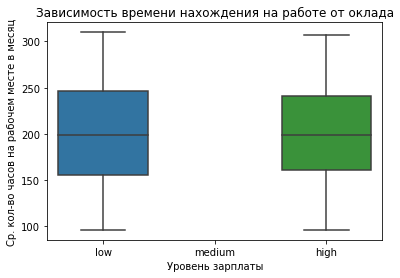

In [371]:
ax = sns.boxplot(x="salary", y="average_montly_hours",
            data=df[(df['salary'] == 'high') | (df['salary'] == 'low')]).set_title('Зависимость времени нахождения на работе от оклада')
plt.ylabel('Ср. кол-во часов на рабочем месте в месяц')
plt.xlabel('Уровень зарплаты')

На боксплоте значимых видимых отличий нет.

**Сотрудники с высоким окладом проводят на работе статистически столько же времени, как и  сотрудники с низким окладом**

## Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

**Посчитаем долю сотрудников с повышением за последние 5 лет**

In [372]:
#построим сводную таблицу для использования в последующих расчетах
pivot = df.groupby(["left", "promotion_last_5years"]).count()
pivot

satisfaction_level  last_evaluation  \
left promotion_last_5years                                        
0    0                                   11128            11128   
     1                                     300              300   
1    0                                    3552             3552   
     1                                      19               19   

                            number_project  average_montly_hours  \
left promotion_last_5years                                         
0    0                               11128                 11128   
     1                                 300                   300   
1    0                                3552                  3552   
     1                                  19                    19   

                            time_spend_company  Work_accident  department  \
left promotion_last_5years                                                  
0    0                                   11128          11128       11128   
     1                                     300            300         300   
1    0                                    3552           3552        3552   
     1                                      19             19          19   

                            salary  
left promotion_last_5years          
0    0                       11128  
     1                         300  
1    0                        3552  
     1                          19

In [373]:
empl_with_promo = pivot.iloc[1,1]/(pivot.iloc[0,1]+pivot.iloc[1,1])
print('Доля работающих сотрудников с повышением за последние 5 лет: ', "{0:.2f}%".format(empl_with_promo * 100))

Доля работающих сотрудников с повышением за последние 5 лет:  2.63%


In [374]:
left_empl_with_promo = pivot.iloc[3,1]/(pivot.iloc[2,1]+pivot.iloc[3,1])
print('Доля уволившихся сотрудников с повышением за последние 5 лет: ', "{0:.2f}%".format(left_empl_with_promo * 100))

Доля уволившихся сотрудников с повышением за последние 5 лет:  0.53%


**Средняя степень удовлетворенности**

In [375]:
sat_level = df.satisfaction_level.loc[df['left'] == 0].mean()
print('Средняя степень удовлетворенности работающих сотрудников: ', "{0:.2f}%".format(sat_level * 100))

Средняя степень удовлетворенности работающих сотрудников:  66.68%


In [376]:
left_sat_level = df.satisfaction_level.loc[df['left'] == 1].mean()
print('Средняя степень удовлетворенности уволившихся сотрудников: ', "{0:.2f}%".format(left_sat_level * 100))

Средняя степень удовлетворенности уволившихся сотрудников:  44.01%


**Среднее количество проектов**

In [377]:
projects_quant = df.number_project.loc[df['left'] == 0].mean()
print('Среднее количество проектов у работающих сотрудников: ', "{0:.2f}".format(projects_quant))

Среднее количество проектов у работающих сотрудников:  3.79


In [378]:
left_projects_quant = df.number_project.loc[df['left'] == 1].mean()
print('Среднее количество проектов у уволившихся сотрудников: ', "{0:.2f}".format(left_projects_quant))

Среднее количество проектов у уволившихся сотрудников:  3.86


## Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборке

### Модель линейного дискриминантного анализа LDA

In [670]:
#импортируем библиотеки
import numpy as np
from sklearn.model_selection import train_test_split

In [689]:
#Разделяем данные на тестовые и тренировочные в соотношении 30/70, 
#указывем random_state=42. Используем train_test_split
# в X записываем саму матрицу, а в у -   0 или 1
# из датафрейма df, столбцa 'left'
#оставим  только столбцы с данными, которые влияют на прогнозирование (это мы уже проверили в ходе нашей работы)
#(satisfaction_level,number_project,average_montly_hours,promotion_last_5years)
X = df.iloc[:,[0,2,3,7]]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  

In [690]:
X_train.shape

(10499, 4)

In [691]:
y_train.shape

(10499,)

In [692]:
#Построим модель линейного дискриминантного анализа LDA, оцениваем ее точность на тестовых данных
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearDiscriminantAnalysis()

In [693]:
# Вычисляем категориальные значения y_pred, используя тестовые данные X_test
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [694]:
# Найдем значение коэффициента детерминации
model.score(X_test, y_test) 

0.7611111111111111

В связи с тем, что коэф.детерминации должен стремиться к 1, а у нас 0.76 , можно сказать что модель данных  отличается от наивной (средней) модели и хорошо объясняет закономерность данных

## Для сравнения применим способ классификации Random Forest

In [695]:
#Разделяем данные на тестовые и тренировочные в соотношении 30/70, 
#указывем random_state=42. Используем train_test_split
# в X записываем саму матрицу, а в у -   0 или 1
# из датафрейма df, столбцa 'left'
#оставим  только столбцы  с данными, которые влияют на прогнозирование (это мы уже проверили в ходе нашей работы)
#(satisfaction_level,number_project,average_montly_hours,promotion_last_5years)
X = df.iloc[:,[0,2,3,7]]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  

In [696]:
X_train.shape

(10499, 4)

In [697]:
y_train.shape

(10499,)

In [701]:
#Построим модель Random Forest,  оцениваем ее точность на тестовых данных
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

RandomForestClassifier()

In [702]:
# Вычисляем категориальные значения y_pred, используя тестовые данные X_test
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [703]:
# Найдем значение коэффициента детерминации
model.score(X_test, y_test) 

0.9506666666666667

 В связи с тем, что коэф.детерминации должен стремиться к 1, а у нас 0.95 , можно сказать что модель данных  отличается от наивной (средней) модели и отлично объясняет закономерность данных

**Классификатор Random Forest лучше других построил модель прогноза, предсказывающую увольнение сотрудника**